<h2>Capacitated Vehicle Routing problem<h2>



In this problem, we will explore the CVRP. Before going to details, let's first discuss the networtk topology: 

- $n$: the number of clients 
- $\mathcal{N}$: Set of clients with $N = \{1,2,3,4,\dots,n\}$
- $\mathcal{V}$: Set of vetices (or nodes), with $V = \{0\} \cup N$
- $A$ is set of arcs, with $\mathcal{A} = \{(i,j) \in V^2: i \neq j  \}$
- $c_{i,j}$ is cost of travel over arc $(i,j) \in \mathcal{A}$
- $Q$ is the vehicle capacity
- $q_i$ is the amount that has to be delivered to customer $i \in \mathcal{N}$

Then, the formulation is the following:

\begin{align}
    & \sum_{i,j \in \mathcal{A}} ~~ c_{i,j} x_{i,j} \\
     \text{s.t} & ~~ \sum_{j \in \mathcal{V, j \neq i}} x_{i,j} = 1, ~ \forall i \\
    & \sum_{i \in \mathcal{V, i \neq j}} x_{i,j} = 1, ~ \forall j \\
    & u_i + q_j = u_j ~ \text{if} ~ x_{i,j} = 1, ~ \forall i,j \in \mathcal{A}: i,j \neq 0 \\
    & q_i \leq u_i \leq Q, ~~ \forall i \\
    & x_{i,j} \in \{0,1\}, ~~ \forall i,j
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rnd = np.random
rnd.seed(3)


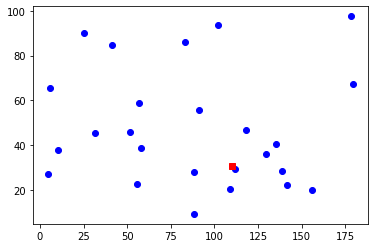

In [2]:
n = 25 # number of clients
xc = rnd.rand(n+1)*200
yc = rnd.rand(n+1)*100
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')

In [3]:
N = [i for i in range(1, n+1)]
V = [0] + N
A = [(i,j) for i in V for j in V if i != j]
# save the distance as dictionary for A
c = {(i,j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i,j in A}
Q = 30
q = {i: rnd.randint(1,10) for i in N}
q

{1: 2,
 2: 5,
 3: 2,
 4: 3,
 5: 3,
 6: 5,
 7: 9,
 8: 1,
 9: 7,
 10: 1,
 11: 5,
 12: 2,
 13: 6,
 14: 2,
 15: 9,
 16: 9,
 17: 8,
 18: 1,
 19: 1,
 20: 2,
 21: 8,
 22: 9,
 23: 8,
 24: 5,
 25: 1}

In [4]:
from gurobipy import Model, GRB, quicksum

mdl = Model('CVRP')


# set variables
x = mdl.addVars(A, vtype=GRB.BINARY, name="x")
u = mdl.addVars(N, vtype=GRB.CONTINUOUS, name= "u")

# set objective
mdl.setObjective(quicksum(x[i,j]*c[i,j] for i,j in A), GRB.MINIMIZE)
mdl.addConstrs(quicksum(x[i,j] for j in V if j != i) == 1 for i in N)
mdl.addConstrs(quicksum(x[i,j] for i in V if i != j) == 1 for j in N)
# capacity constraints
mdl.addConstrs(u[i] >= q[i] for i in N)
mdl.addConstrs(u[i] <= Q for i in N)
# sub-tour elimination
mdl.addConstrs((x[i,j] == 1) >> (u[i] + q[j] == u[j]) for i,j in A if i != 0 and j != 0)


mdl.Params.MIPGap = 0.1 # optimality gap    
mdl.Params.TimeLimit = 30 # seconds
mdl.optimize()



Set parameter Username
Academic license - for non-commercial use only - expires 2024-07-23
Set parameter MIPGap to value 0.1
Set parameter TimeLimit to value 30
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11700KF @ 3.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 100 rows, 675 columns and 1300 nonzeros
Model fingerprint: 0xf98973e4
Model has 600 general constraints
Variable types: 25 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
  GenCon rhs range [1e+00, 9e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 1340 rows and 245 columns
Presolve time: 0.04s
Presolved: 1440 rows, 920 columns, 8991 nonzeros
Variable types: 270 continuous, 650 integer (650 binary)
Found heuristic solution:

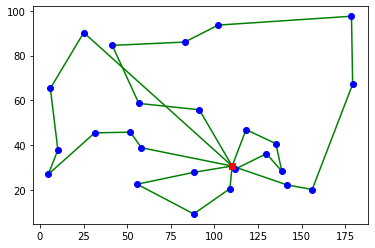

In [5]:
active_arcs = [a for a in A if x[a].x > 0.99]
for i,j in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', zorder=0)   
    
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')
